In [122]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import RFECV
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.base import clone
import seaborn as sns

In [123]:
cyto = pd.read_csv('../data/new_data/cytokines.csv', index_col=['Individual'])
biochem = pd.read_csv('../data/Biochem.csv', index_col=0)
cyto_biochem = cyto.join(biochem.iloc[:, 3:], how='inner')
expression = pd.read_csv('../data/new_data/expression.csv', index_col='Individual')
expression = expression.dropna()
# log2 all the expressions
expression.iloc[:,:-2] = np.log2(expression.iloc[:,:-2])
expression.columns += '_exp'
cyto_biochem_exp = cyto_biochem.join(expression, how='inner')



In [124]:
cyto_biochem_exp

,IL-6,MCP-1,IL-1b,TNF-a,IL-10,IL-8,ИМТ,ТКИМ общ,Степень стеноза,АЛАТ,...,MT-CYB_exp,MT-ND1_exp,MT-ND4_exp,MT-RNR1_exp,MT-RNR2_exp,DRP1_exp,MFN2_exp,NFE2L2_exp,OPA1_exp,TFAM_exp
5,220.947754,43.464305,2.795976,307.813620,75.573990,8.518603,27.616279,0.560,0.0,15.8,...,-0.935117,0.471031,1.645702,0.963696,0.565890,1.578886,-1.086017,0.246870,0.34474,3.42678
6,99.129891,12.545548,1.970814,12.892022,14.675090,157.289657,43.743332,0.700,0.0,26.9,...,-0.646112,0.292311,1.584000,0.762987,0.547845,1.145377,-0.339272,0.134063,0.00088,2.77998
7,71.148681,3.026672,2.425959,24.003158,23.084995,1.000000,38.841496,NaN,NaN,42.4,...,3.277985,0.888772,0.985136,0.932968,1.256467,1.272095,-1.667172,0.999668,1.92792,3.83777
11,20.000000,1.215848,3.190663,24.434444,24.109061,1.000000,34.316109,NaN,NaN,47.7,...,0.731183,-1.147522,-1.895395,-1.104387,-0.654944,-0.308930,-0.904467,1.078063,1.78225,0.81731
27,412.888465,11.685180,5.505951,41.587768,344.189944,8.995548,43.709826,0.800,0.0,22.2,...,-1.498179,-0.349971,0.623867,0.321351,-0.011879,0.236499,0.485623,-0.157592,3.43077,1.24666
31,158.174432,11.314378,4.322621,72.791282,79.709176,1.813686,34.949435,NaN,NaN,12.4,...,-1.325539,0.409798,1.313072,0.252173,-0.070360,1.476107,-2.263889,-0.392270,2.56579,2.54013
34,1993.166287,302.039807,18.994232,NaN,NaN,8.062782,39.900000,0.500,0.0,17.8,...,2.084064,-0.739854,-0.565545,0.050745,0.527871,1.248523,0.462220,2.372295,1.92210,1.92604
35,1310.198720,70.747454,9.572084,NaN,120.640491,16.087516,37.078192,NaN,NaN,21.0,...,-2.070967,-0.597933,-0.152324,-0.702750,-0.843474,-2.600687,-0.091172,-0.057046,2.71749,0.47404
37,1030.968992,7.986329,2.747847,14.084579,NaN,4.515519,24.194841,NaN,NaN,15.1,...,-1.261881,0.330444,0.255682,-0.595969,-0.296191,-2.368700,0.172065,0.095155,0.03930,1.30623
50,291.934273,6.798614,6.176347,62.481581,168.681592,4.222795,33.675603,0.650,0.0,27.9,...,-3.279284,-0.689195,-0.944249,-2.272994,-2.348133,-3.263819,-1.316708,-2.689195,7.08545,0.19789


In [125]:
mut_per_locus = pd.read_csv('../data/mut_per_locus/mtDNA.csv')
mut_per_locus = mut_per_locus.set_index('Individual')
mapping = {
    'Control': 0,
    'Obesity': 1,
    'MetS': 2,
}
mut_per_locus['Group'] = mut_per_locus['Group'].map(mapping)
mut_per_locus

,Group,MT low,MT int,MT homo,DL low,DL int,DL homo,CDS low,CDS int,CDS homo,tRNA low,tRNA int,tRNA homo,rRNA low,rRNA int,rRNA homo
Individual,,,,,,,,,,,,,,,,
37,0,0.000060,0.000000,0.00109,0.000891,0.000000,0.004460,0.000000,0.000000,0.000707,0.0,0.0,0.000000,0.000000,0.00000,0.001925
65,0,0.000000,0.000060,0.00054,0.000000,0.000891,0.001780,0.000000,0.000000,0.000265,0.0,0.0,0.000000,0.000000,0.00000,0.001540
94,0,0.000060,0.000060,0.00072,0.000891,0.000000,0.002670,0.000000,0.000088,0.000442,0.0,0.0,0.000000,0.000000,0.00000,0.001540
112,0,0.000060,0.000000,0.00054,0.000891,0.000000,0.003570,0.000000,0.000000,0.000177,0.0,0.0,0.000000,0.000000,0.00000,0.001155
113,0,0.000000,0.000000,0.00097,0.000000,0.000000,0.002670,0.000000,0.000000,0.000884,0.0,0.0,0.000000,0.000000,0.00000,0.001155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,2,0.000604,0.000362,0.00072,0.003565,0.001783,0.002674,0.000265,0.000177,0.000531,0.0,0.0,0.000000,0.001155,0.00077,0.001155
107,2,0.000060,0.000060,0.00217,0.000891,0.000000,0.008021,0.000000,0.000088,0.001592,0.0,0.0,0.001992,0.000000,0.00000,0.002309
108,2,0.000000,0.000000,0.00103,0.000000,0.000000,0.006239,0.000000,0.000000,0.000531,0.0,0.0,0.000000,0.000000,0.00000,0.001540


In [126]:
cyto_biochem_exp_mut = cyto_biochem_exp.join(mut_per_locus, how='inner')
cyto_biochem_exp_mut = cyto_biochem_exp_mut.rename(columns={'Group': 'disease'})
cyto_biochem_exp_mut

,IL-6,MCP-1,IL-1b,TNF-a,IL-10,IL-8,ИМТ,ТКИМ общ,Степень стеноза,АЛАТ,...,DL homo,CDS low,CDS int,CDS homo,tRNA low,tRNA int,tRNA homo,rRNA low,rRNA int,rRNA homo
5,220.947754,43.464305,2.795976,307.813620,75.573990,8.518603,27.616279,0.560,0.0,15.8,...,0.002674,0.000000,0.000000,0.000619,0.0,0.0,0.000000,0.000000,0.000000,0.001540
6,99.129891,12.545548,1.970814,12.892022,14.675090,157.289657,43.743332,0.700,0.0,26.9,...,0.004456,0.000000,0.000088,0.001503,0.0,0.0,0.000664,0.000000,0.000000,0.001925
7,71.148681,3.026672,2.425959,24.003158,23.084995,1.000000,38.841496,NaN,NaN,42.4,...,0.007130,0.000000,0.000000,0.001238,0.0,0.0,0.001328,0.000000,0.000000,0.001925
11,20.000000,1.215848,3.190663,24.434444,24.109061,1.000000,34.316109,NaN,NaN,47.7,...,0.003565,0.000000,0.000088,0.000531,0.0,0.0,0.000000,0.000000,0.000000,0.001540
27,412.888465,11.685180,5.505951,41.587768,344.189944,8.995548,43.709826,0.800,0.0,22.2,...,0.004456,0.000000,0.000000,0.001415,0.0,0.0,0.001328,0.000000,0.000000,0.002694
31,158.174432,11.314378,4.322621,72.791282,79.709176,1.813686,34.949435,NaN,NaN,12.4,...,0.001783,0.000000,0.000000,0.000531,0.0,0.0,0.000000,0.000000,0.000000,0.001540
34,1993.166287,302.039807,18.994232,NaN,NaN,8.062782,39.900000,0.500,0.0,17.8,...,0.012478,0.000000,0.000000,0.001415,0.0,0.0,0.000000,0.000000,0.000000,0.001925
35,1310.198720,70.747454,9.572084,NaN,120.640491,16.087516,37.078192,NaN,NaN,21.0,...,0.005348,0.000088,0.000000,0.000265,0.0,0.0,0.000000,0.000000,0.000000,0.001540
37,1030.968992,7.986329,2.747847,14.084579,NaN,4.515519,24.194841,NaN,NaN,15.1,...,0.004460,0.000000,0.000000,0.000707,0.0,0.0,0.000000,0.000000,0.000000,0.001925
50,291.934273,6.798614,6.176347,62.481581,168.681592,4.222795,33.675603,0.650,0.0,27.9,...,0.008021,0.000000,0.000000,0.001238,0.0,0.0,0.000664,0.000000,0.000000,0.001925


In [127]:
cyto_biochem_exp_mut.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, 5 to 166
Data columns (total 65 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IL-6               52 non-null     float64
 1   MCP-1              53 non-null     float64
 2   IL-1b              53 non-null     float64
 3   TNF-a              44 non-null     float64
 4   IL-10              41 non-null     float64
 5   IL-8               53 non-null     float64
 6   ИМТ                53 non-null     float64
 7   ТКИМ общ           22 non-null     float64
 8   Степень стеноза    20 non-null     float64
 9   АЛАТ               53 non-null     float64
 10  АСАТ               53 non-null     float64
 11  ГЛ                 53 non-null     float64
 12  Железо             44 non-null     float64
 13  ЩелФос             44 non-null     float64
 14  ГГТ                53 non-null     float64
 15  МОЧ-НА             53 non-null     float64
 16  КРЕАТИ             53 non-null  

In [128]:
cyto_biochem_exp_mut.drop(columns=['ТКИМ общ  ', 'Степень стеноза  '], inplace=True)
# fill nans with means of corresponding cols
cyto_biochem_exp_mut = cyto_biochem_exp_mut.fillna(cyto_biochem_exp_mut.mean())

In [129]:
X = cyto_biochem_exp_mut.drop('disease', axis=1)
y = cyto_biochem_exp_mut['disease']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)
print(f"Before SMOTE: Class 0: {sum(y == 0)}, Class 1: {sum(y == 1)}, Class 2: {sum(y == 2)}")
print(f"After SMOTE: Class 0: {sum(y_resampled == 0)}, Class 1: {sum(y_resampled == 1)}, Class 2: {sum(y == 2)}")

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, stratify=y_resampled, test_size=0.2)

param_grid_improved = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', 0.5, 0.8],
    'bootstrap': [True, False]
}


random_search = RandomizedSearchCV(
    RandomForestClassifier(class_weight='balanced'),
    param_grid_improved,
    n_iter=100,
    cv=10,
    scoring='roc_auc_ovr',
    n_jobs=-1
)

random_search.fit(X_train, y_train)
print("Best score:", random_search.best_score_)
print("Best params:", random_search.best_params_)

model = random_search.best_estimator_

Before SMOTE: Class 0: 21, Class 1: 11, Class 2: 21
After SMOTE: Class 0: 21, Class 1: 21, Class 2: 21
Best score: 0.9416666666666667
Best params: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.8, 'max_depth': 5, 'bootstrap': False}


Feature Importance:
       feature  importance
6        ИМТ      0.251218
27      ЦРБв      0.244299
44  NFE2L2_exp    0.164447
22      ЛПВП      0.054023
51      DL int    0.043843
4        IL-10    0.039619
48      MT int    0.034161
19        ТГ      0.028778
12       ГГТ      0.019378
32     p65_exp    0.014634
45    OPA1_exp    0.012632
3        TNF-a    0.010124
42    DRP1_exp    0.008695
35    SOD2_exp    0.008561
43    MFN2_exp    0.007658


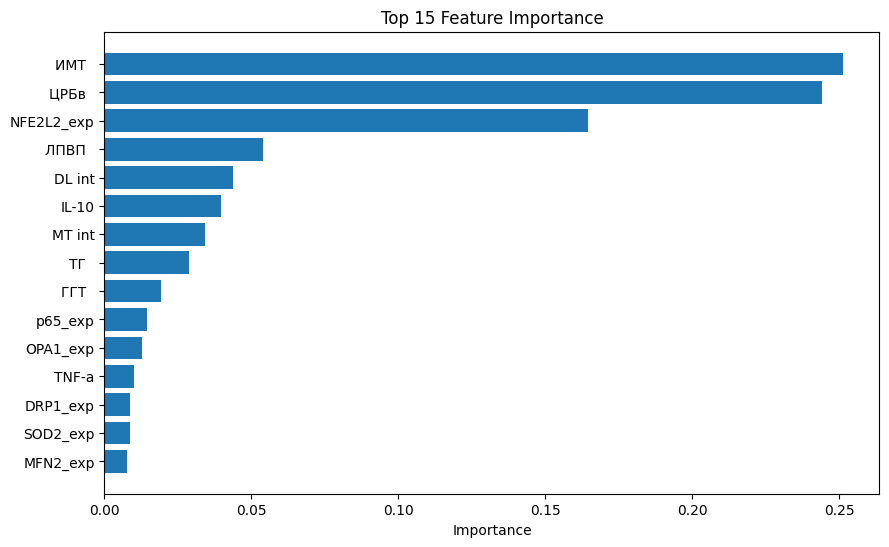

<Figure size 640x480 with 0 Axes>

In [ ]:
feature_importance = model.feature_importances_

feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

print("Feature Importance:")
print(feature_importance_df.head(15))


plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['feature'][:15], feature_importance_df['importance'][:15])
plt.xlabel('Importance')
plt.title('Top 15 Feature Importance')
plt.gca().invert_yaxis()
plt.savefig('../plots/feat_importance.png', dpi=600)
plt.show()

In [131]:
feature_importance_df

,feature,importance
6,ИМТ,0.251218
27,ЦРБв,0.244299
44,NFE2L2_exp,0.164447
22,ЛПВП,0.054023
51,DL int,0.043843
...,...,...
54,CDS int,0.000000
57,tRNA int,0.000000
59,rRNA low,0.000000
60,rRNA int,0.000000
